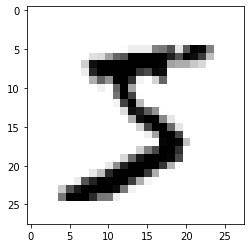

5
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.3126 - accuracy: 0.9118
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1347 - accuracy: 0.9609
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9731
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0682 - accuracy: 0.9799
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.9763
test_acc: 0.9763000011444092 adam
Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 1.1245 - accuracy: 0.7325
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5333 - accuracy: 0.8672
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4274 - accuracy: 0.8864
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3797 - accuracy: 0.8963
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
from numpy import asarray


def build(optim):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def build_adam2():  # измененный оптимизатор adam изменил скорость обучения
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    myAdam = Adam(learning_rate=0.1)
    model.compile(optimizer=myAdam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def image_to_data(path, num):
    img = Image.open(path)
    numpydata = asarray(img)[:, :, 0]
    res = np.array([np.uint8(num), np.uint8(num)])
    test_label = to_categorical(res, num_classes=10)
    test_image = np.array([numpydata, numpydata]) / 255.0
    return test_image, test_label


mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

rain_images = train_images / 255.0
test_images = test_images / 255.0
rain_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()
print(train_labels[0])
model1 = build('adam')
model1.fit(rain_images, rain_labels, epochs=5, batch_size=128)  # заменил все на rain 
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'adam')


model = build('sgd')
model.fit(rain_images, rain_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'sgd')

model = build('RMSprop')
model.fit(rain_images, rain_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'rms')

model = build_adam2()
model.fit(rain_images, rain_labels, epochs=5, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'adam2')


Далее загрузка собственных данных

In [32]:
test_images, test_labels = image_to_data('50.tif', 3)
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

1/1 [==============================] - 0s 62ms/step - loss: 4.4153 - accuracy: 0.0000e+00
test_acc: 0.0
test_loss: 4.415286064147949
